<a href="https://colab.research.google.com/github/tqsyed/miscZoo/blob/main/dualGencycleGANforAgeProgressionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [ ]:
# Install Kaggle and KaggleHub if not already installed
!pip install kaggle
!pip install kagglehub


In [ ]:
# Copy Kaggle credentials to the correct location
!mkdir -p ~/.kaggle
!cp /path_to/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat '/path_to/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub
import os
from PIL import Image
import numpy as np
import torch
from torchvision import transforms

# Step 1: Download the UTKFace dataset
dataset_path = kagglehub.dataset_download("jangedoo/utkface-new")
print("Path to dataset files:", dataset_path)

# Step 2: Set output directories
preprocessed_path = "/content/preprocessed_utkface"
os.makedirs(preprocessed_path, exist_ok=True)

100%|██████████| 331M/331M [00:01<00:00, 183MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1"

# List the contents of the top-level directory
print("Contents of dataset directory:")
print(os.listdir(dataset_path))

# List contents of each subdirectory
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        print(f"\nContents of {subdir}:")
        subdir_files = os.listdir(subdir_path)
        print(f"Number of files in {subdir}: {len(subdir_files)}")
        print(subdir_files[:5])  # Show first 5 files in the subdirectory

Contents of dataset directory:
['UTKFace', 'utkface_aligned_cropped', 'crop_part1']

Contents of UTKFace:
Number of files in UTKFace: 23708
['43_0_0_20170120222409079.jpg.chip.jpg', '26_1_2_20170116184248014.jpg.chip.jpg', '25_0_0_20170119171142840.jpg.chip.jpg', '1_0_4_20161221195419136.jpg.chip.jpg', '24_1_0_20170117150515251.jpg.chip.jpg']

Contents of utkface_aligned_cropped:
Number of files in utkface_aligned_cropped: 2
['UTKFace', 'crop_part1']

Contents of crop_part1:
Number of files in crop_part1: 9780
['1_0_4_20161221195419136.jpg.chip.jpg', '76_0_0_20170111222424361.jpg.chip.jpg', '53_0_0_20170111202320442.jpg.chip.jpg', '10_1_1_20170109203522559.jpg.chip.jpg', '50_0_0_20170111171747294.jpg.chip.jpg']


Due to memory constraints, all images will be resized to 128 x 128 pixels. Images are categorized into two domains: young and old. An age threshold of 45 years was deliberately chosen to ensure an approximately equal distribution of images between these domains.

In [ ]:
# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Keeping 128 X 128 because of memory limitation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Preprocessing function
def preprocess_utkface(dataset_dir, output_dir, age_threshold=45):
    """
    Preprocesses the UTKFace dataset by resizing, normalizing, and categorizing images
    into young and old based on the age_threshold.
    Args:
        dataset_dir (str): Path to the UTKFace dataset.
        output_dir (str): Path to save preprocessed images.
        age_threshold (int): Age threshold to divide young and old categories.
    """
    young_dir = os.path.join(output_dir, "young")
    old_dir = os.path.join(output_dir, "old")
    os.makedirs(young_dir, exist_ok=True)
    os.makedirs(old_dir, exist_ok=True)

    # Process each image in the dataset directory
    for file in os.listdir(dataset_dir):
        if file.endswith(".jpg"):
            # Extract age from the filename
            try:
                age = int(file.split("_")[0])
            except ValueError:
                print(f"Skipping file with invalid age: {file}")
                continue

            img_path = os.path.join(dataset_dir, file)

            # Open the image and apply transformations
            try:
                img = Image.open(img_path).convert("RGB")
                img_tensor = transform(img)

                # Categorize image into young or old
                category = "young" if age <= age_threshold else "old"
                save_dir = young_dir if category == "young" else old_dir
                save_path = os.path.join(save_dir, file.replace(".jpg", ".pt"))

                # Save the preprocessed image as a tensor
                torch.save(img_tensor, save_path)
                print(f"Saved {file} to {save_dir}")
            except Exception as e:
                print(f"Error processing file {file}: {e}")

# Run preprocessing
dataset_path = "/root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace"
preprocess_utkface(dataset_path, preprocessed_path)
print("Preprocessing complete. Preprocessed data saved at:", preprocessed_path)

Streaming output truncated to the last 5000 lines.
Saved 23_1_2_20170116172854458.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 33_1_1_20170114030609784.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 24_0_1_20170120133915911.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 58_0_2_20170104212958196.jpg.chip.jpg to /content/preprocessed_utkface/old
Saved 62_0_0_20170111222711250.jpg.chip.jpg to /content/preprocessed_utkface/old
Saved 38_0_0_20170116001012194.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 1_1_0_20170109194410994.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 26_1_1_20170116023939164.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 26_0_1_20170114031951577.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 36_0_1_20170117010044349.jpg.chip.jpg to /content/preprocessed_utkface/young
Saved 51_0_0_20170109011802151.jpg.chip.jpg to /content/preprocessed_utkface/old
Saved 28_1_2_20170116175907657.jpg.chip.jpg

In [ ]:
# Archive the preprocessed dataset
!tar -czf preprocessed_utkface.tar.gz -C /content preprocessed_utkface

# Save to Google Drive or Colab environment
from google.colab import drive
drive.mount('/content/drive')

# Move the archive to Google Drive
!cp preprocessed_utkface.tar.gz /content/drive/MyDrive/
print("Preprocessed dataset saved to Google Drive.")

Mounted at /content/drive
Preprocessed dataset saved to Google Drive.


# Training and Validation

In [ ]:
import os
import random
import shutil
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import itertools
import torch.optim as optim
from google.colab import drive
import os
import shutil
import tarfile

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the compressed dataset in Google Drive
compressed_path = '/content/drive/MyDrive/preprocessed_utkface.tar.gz'

# Extract the dataset
if not os.path.exists('/content/preprocessed_utkface'):
    with tarfile.open(compressed_path, 'r:gz') as tar:
        tar.extractall(path='/content/')
    print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

Mounted at /content/drive
Dataset extracted successfully.


In [ ]:
# Dataset class for preprocessed UTKFace data
class PreprocessedUTKFaceDataset(Dataset):
    def __init__(self, root_dir, category, transform=None):
        """
        Args:
            root_dir (str): Directory with preprocessed data.
            category (str): Either 'young' or 'old'.
            transform (callable, optional): Optional transform to apply to images.
        """
        self.category_dir = os.path.join(root_dir, category)
        self.image_files = [f for f in os.listdir(self.category_dir) if f.endswith(".pt")]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Ensure you are loading the tensor from the file path
        img_path = os.path.join(self.category_dir, self.image_files[idx])
        image = torch.load(img_path)  # Load the tensor
        if self.transform:
            image = self.transform(image)  # Apply any transformations if needed
        return image


We are only picking subset of images from the dataset each time due to memory limitaion

In [ ]:
import random
import torch
import os
from torch.utils.data import Dataset, DataLoader

# Function to dynamically create subsets
def create_dynamic_subset(source_dir, subset_size):
    all_files = [f for f in os.listdir(source_dir) if f.endswith('.pt')]
    subset_files = random.sample(all_files, min(subset_size, len(all_files)))
    return subset_files

# Function to load a chunk of data dynamically
def load_data_chunk(root_dir, category, subset_files):
    images = []
    for file in subset_files:
        img_path = os.path.join(root_dir, category, file)
        image = torch.load(img_path)
        images.append(image)
    return torch.stack(images)

# Dataset class to load paired young and old images dynamically
class DynamicPairedDataset(Dataset):
    def __init__(self, young_images, old_images):
        self.young_images = young_images
        self.old_images = old_images

    def __len__(self):
        return max(len(self.young_images), len(self.old_images))

    def __getitem__(self, idx):
        young_img = self.young_images[idx % len(self.young_images)]
        old_img = self.old_images[idx % len(self.old_images)]
        return young_img, old_img

# Paths and Parameters
root_dir = '/content/preprocessed_utkface'
subset_size = 9000 # Change as per available RAM
batch_size = 16 # Change as per available RAM

# Training and Validation Split (Manual Chunking)
def load_and_split_data(root_dir, subset_size, train_ratio=0.8):
    # Create dynamic subsets
    young_files = create_dynamic_subset(os.path.join(root_dir, 'young'), subset_size)
    old_files = create_dynamic_subset(os.path.join(root_dir, 'old'), subset_size)

    # Load the images
    young_images = load_data_chunk(root_dir, 'young', young_files)
    old_images = load_data_chunk(root_dir, 'old', old_files)

    # Split into train and validation sets
    train_size_young = int(len(young_images) * train_ratio)
    val_size_young = len(young_images) - train_size_young

    train_size_old = int(len(old_images) * train_ratio)
    val_size_old = len(old_images) - train_size_old

    train_young = young_images[:train_size_young]
    val_young = young_images[train_size_young:]

    train_old = old_images[:train_size_old]
    val_old = old_images[train_size_old:]

    # Create paired datasets
    train_dataset = DynamicPairedDataset(train_young, train_old)
    val_dataset = DynamicPairedDataset(val_young, val_old)

    # Create dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_dataloader, val_dataloader

# Load train and validation dataloaders
train_dataloader, val_dataloader = load_and_split_data(root_dir, subset_size)

# Example: Check data from dataloaders
for i, (young_batch, old_batch) in enumerate(train_dataloader):
    print(f"Batch {i} - Young: {young_batch.shape}, Old: {old_batch.shape}")
    break


<ipython-input-4-defb03c8a60f>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(img_path)


Batch 0 - Young: torch.Size([16, 3, 128, 128]), Old: torch.Size([16, 3, 128, 128])


Cloning this repo to speed up training by loading pre-trained weights

In [ ]:
!git clone https://github.com/jiechen2358/FaceAging-by-cycleGAN.git
%cd FaceAging-by-cycleGAN

Cloning into 'FaceAging-by-cycleGAN'...
remote: Enumerating objects: 9050, done.
remote: Total 9050 (delta 0), reused 0 (delta 0), pack-reused 9050 (from 1)
Receiving objects: 100% (9050/9050), 2.09 GiB | 59.36 MiB/s, done.
Resolving deltas: 100% (364/364), done.
Updating files: 100% (6335/6335), done.
/content/FaceAging-by-cycleGAN


In [ ]:
import os

repo_path = '/content/FaceAging-by-cycleGAN'
os.chdir(repo_path)  # Change working directory to the repository
print("Current working directory:", os.getcwd())

Current working directory: /content/FaceAging-by-cycleGAN


In [ ]:
!ls /content/FaceAging-by-cycleGAN/models

base_model.py  cycle_gan_model.py  __init__.py	networks.py  README.md	test_model.py


In [ ]:
import torch
import torch.nn as nn
import functools
from torch.optim import lr_scheduler
import os

In [ ]:
# Make code device agnostic
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Model Architecture:
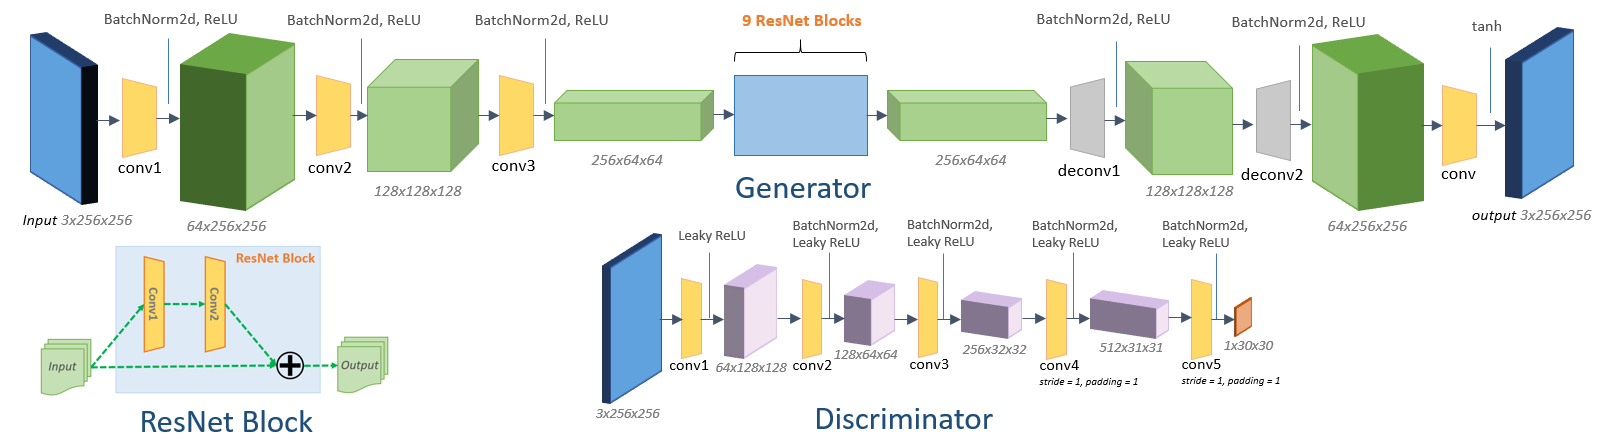


While the sample image shown above is 256 x 256 pixels, we reduced the input image size to 128 x 128 pixels to address memory limitations and improve the convergence speed of CycleGANs. The architecture implemented in this project was adopted from the referenced GitHub repository due to its superior performance.

[FaceAging-by-cycleGAN](https://github.com/jiechen2358/FaceAging-by-cycleGAN.git/)

In [ ]:
def get_norm_layer(norm_type='instance'):
    if norm_type == 'batch':
        norm_layer = functools.partial(nn.BatchNorm2d, affine=True)
    elif norm_type == 'instance':
        norm_layer = functools.partial(nn.InstanceNorm2d, affine=False, track_running_stats=False)
    elif norm_type == 'none':
        norm_layer = None
    else:
        raise NotImplementedError(f'Normalization layer [{norm_type}] is not found')
    return norm_layer

def init_weights(net, init_type='normal', gain=0.02):
    def init_func(m):
        classname = m.__class__.__name__
        if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
            if init_type == 'normal':
                nn.init.normal_(m.weight.data, 0.0, gain)
            elif init_type == 'xavier':
                nn.init.xavier_normal_(m.weight.data, gain=gain)
            elif init_type == 'kaiming':
                nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
            elif init_type == 'orthogonal':
                nn.init.orthogonal_(m.weight.data, gain=gain)
            else:
                raise NotImplementedError(f'Initialization method [{init_type}] is not implemented')
            if hasattr(m, 'bias') and m.bias is not None:
                nn.init.constant_(m.bias.data, 0.0)
        elif classname.find('BatchNorm2d') != -1:
            nn.init.normal_(m.weight.data, 1.0, gain)
            nn.init.constant_(m.bias.data, 0.0)

    print(f'Initialize network with {init_type}')
    net.apply(init_func)

def init_net(net, init_type='normal', init_gain=0.02, gpu_ids=[]):
    if len(gpu_ids) > 0:
        assert(torch.cuda.is_available())
        net.to(gpu_ids[0])
        net = torch.nn.DataParallel(net, gpu_ids)
    init_weights(net, init_type, gain=init_gain)
    return net

###############################################################################
# Network Classes
###############################################################################

# ResNet Generator
class ResnetGenerator(nn.Module):
    def __init__(self, input_nc, output_nc, ngf=64, norm_layer=nn.BatchNorm2d, use_dropout=False, n_blocks=6, padding_type='reflect', lock_layers=0):
        assert(n_blocks >= 0)
        super(ResnetGenerator, self).__init__()
        if type(norm_layer) == functools.partial:
            use_bias = norm_layer.func == nn.InstanceNorm2d
        else:
            use_bias = norm_layer == nn.InstanceNorm2d

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=use_bias),
                 norm_layer(ngf),
                 nn.ReLU(True)]

        # Downsampling
        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3, stride=2, padding=1, bias=use_bias),
                      norm_layer(ngf * mult * 2),
                      nn.ReLU(True)]

        # ResNet blocks
        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResnetBlock(ngf * mult, padding_type=padding_type, norm_layer=norm_layer, use_dropout=use_dropout, use_bias=use_bias)]
            if i == (lock_layers - 1):
                for layer in model:
                    for parameter in layer.parameters():
                        parameter.requires_grad = False

        # Upsampling
        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2), kernel_size=3, stride=2, padding=1, output_padding=1, bias=use_bias),
                      norm_layer(int(ngf * mult / 2)),
                      nn.ReLU(True)]
        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        return self.model(input)

# ResNet Block
class ResnetBlock(nn.Module):
    def __init__(self, dim, padding_type, norm_layer, use_dropout, use_bias):
        super(ResnetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim, padding_type, norm_layer, use_dropout, use_bias)

    def build_conv_block(self, dim, padding_type, norm_layer, use_dropout, use_bias):
        conv_block = []
        p = 0
        if padding_type == 'reflect':
            conv_block += [nn.ReflectionPad2d(1)]
        elif padding_type == 'replicate':
            conv_block += [nn.ReplicationPad2d(1)]
        elif padding_type == 'zero':
            p = 1
        else:
            raise NotImplementedError(f'Padding [{padding_type}] is not implemented')

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=p, bias=use_bias), norm_layer(dim), nn.ReLU(True)]
        if use_dropout:
            conv_block += [nn.Dropout(0.5)]

        p = 0
        if padding_type == 'reflect':
            conv_block += [nn.ReflectionPad2d(1)]
        elif padding_type == 'replicate':
            conv_block += [nn.ReplicationPad2d(1)]
        elif padding_type == 'zero':
            p = 1
        else:
            raise NotImplementedError(f'Padding [{padding_type}] is not implemented')

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=p, bias=use_bias), norm_layer(dim)]
        return nn.Sequential(*conv_block)

    def forward(self, x):
        return x + self.conv_block(x)


class NLayerDiscriminator(nn.Module):
    def __init__(self, input_nc, ndf=64, n_layers=3, norm_layer=nn.BatchNorm2d, use_sigmoid=False, lock_layers=0):
        """
        Args:
            input_nc (int): Number of input channels (e.g., 3 for RGB images).
            ndf (int): Number of filters in the first conv layer.
            n_layers (int): Number of convolutional layers in the discriminator.
            norm_layer: Normalization layer, e.g., BatchNorm or InstanceNorm.
            use_sigmoid (bool): Whether to use a sigmoid activation at the end.
            lock_layers (int): Number of layers to freeze during training.
        """
        super(NLayerDiscriminator, self).__init__()
        if isinstance(norm_layer, functools.partial):
            use_bias = norm_layer.func == nn.InstanceNorm2d
        else:
            use_bias = norm_layer == nn.InstanceNorm2d

        kw = 4  # Kernel size
        padw = 1  # Padding width
        sequence = [
            nn.Conv2d(input_nc, ndf, kernel_size=kw, stride=2, padding=padw),
            nn.LeakyReLU(0.2, True)
        ]

        nf_mult = 1
        nf_mult_prev = 1
        for n in range(1, n_layers):
            nf_mult_prev = nf_mult
            nf_mult = min(2 ** n, 8)
            sequence += [
                nn.Conv2d(ndf * nf_mult_prev, ndf * nf_mult,
                          kernel_size=kw, stride=2, padding=padw, bias=use_bias),
                norm_layer(ndf * nf_mult),
                nn.LeakyReLU(0.2, True)
            ]
            if n == (lock_layers - 1):
                for layer in sequence:
                    for parameter in layer.parameters():
                        parameter.requires_grad = False

        nf_mult_prev = nf_mult
        nf_mult = min(2 ** n_layers, 8)
        sequence += [
            nn.Conv2d(ndf * nf_mult_prev, ndf * nf_mult,
                      kernel_size=kw, stride=1, padding=padw, bias=use_bias),
            norm_layer(ndf * nf_mult),
            nn.LeakyReLU(0.2, True)
        ]

        sequence += [nn.Conv2d(ndf * nf_mult, 1, kernel_size=kw, stride=1, padding=padw)]

        if use_sigmoid:
            sequence += [nn.Sigmoid()]

        self.model = nn.Sequential(*sequence)

    def forward(self, input):
        """
        Forward pass for the discriminator.
        Args:
            input (Tensor): Input tensor (image).
        Returns:
            Tensor: Output tensor (patch GAN score).
        """
        return self.model(input)



class GANLoss(nn.Module):
    def __init__(self, use_lsgan=True, target_real_label=1.0, target_fake_label=0.0):
        super(GANLoss, self).__init__()
        self.register_buffer('real_label', torch.tensor(target_real_label))
        self.register_buffer('fake_label', torch.tensor(target_fake_label))
        if use_lsgan:
            self.loss = nn.MSELoss()
        else:
            self.loss = nn.BCELoss()

    def get_target_tensor(self, input, target_is_real):
        if target_is_real:
            target_tensor = self.real_label
        else:
            target_tensor = self.fake_label
        return target_tensor.expand_as(input)

    def __call__(self, input, target_is_real):
        target_tensor = self.get_target_tensor(input, target_is_real)
        return self.loss(input, target_tensor)



In [ ]:
# Initialize generators weights
netG_YtoO = ResnetGenerator(3, 3, 64, get_norm_layer('instance'), False, 9).to(device)
netG_OtoY = ResnetGenerator(3, 3, 64, get_norm_layer('instance'), False, 9).to(device)

# Initialize discriminator weights
netD_Y = NLayerDiscriminator(input_nc=3, ndf=64, n_layers=3, norm_layer=get_norm_layer('instance')).to(device)
netD_O = NLayerDiscriminator(input_nc=3, ndf=64, n_layers=3, norm_layer=get_norm_layer('instance')).to(device)

To accelerate the convergence of CycleGANs, we utilized a pre-trained model (wiki_fine_tune_horse2zebra) from the referenced GitHub repository as our initial weights.

In [ ]:
def load_pretrained_weights(netG_YtoO, netG_OtoY, netD_Y, netD_O, device, load_from_drive=False):
    """
    Load pre-trained weights for CycleGAN models.

    Args:
        netG_YtoO: Generator Y-to-O model
        netG_OtoY: Generator O-to-Y model
        netD_Y: Discriminator for Y domain
        netD_O: Discriminator for O domain
        device: PyTorch device
        load_from_drive: If True, load weights from Google Drive, otherwise from repo
    """
    if load_from_drive:
        # Define paths for weights in Google Drive
        drive_path = '/content/drive/MyDrive/CycleGAN_Weights'
        G_YtoO_path = os.path.join(drive_path, 'netG_YtoO.pth')
        G_OtoY_path = os.path.join(drive_path, 'netG_OtoY.pth')
        D_Y_path = os.path.join(drive_path, 'netD_Y.pth')
        D_O_path = os.path.join(drive_path, 'netD_O.pth')
    else:
        # Define paths for weights in the repository
        repo_path = "/content/FaceAging-by-cycleGAN/trained_model/8_wiki_fine_tune_horse2zebra/"
        G_YtoO_path = f"{repo_path}latest_net_G_A.pth"
        G_OtoY_path = f"{repo_path}latest_net_G_B.pth"
        D_Y_path = f"{repo_path}latest_net_D_A.pth"
        D_O_path = f"{repo_path}latest_net_D_B.pth"

    # Load weights
    netG_YtoO.load_state_dict(torch.load(G_YtoO_path, map_location=device))
    netG_OtoY.load_state_dict(torch.load(G_OtoY_path, map_location=device))
    netD_Y.load_state_dict(torch.load(D_Y_path, map_location=device))
    netD_O.load_state_dict(torch.load(D_O_path, map_location=device))

    print(f"Pre-trained weights loaded successfully from {'Google Drive' if load_from_drive else 'repository'}.")


load_pretrained_weights(netG_YtoO, netG_OtoY, netD_Y, netD_O, device, load_from_drive=True)


<ipython-input-12-4c2f9f79a31e>:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG_YtoO.load_state_dict(torch.load(G_YtoO_path, map_location=device))
<ipython-input-12-4

Pre-trained weights loaded successfully from Google Drive.


In [ ]:
# Loss functions
criterion_GAN = GANLoss(use_lsgan=True).to(device)
criterion_cycle = torch.nn.L1Loss().to(device)
criterion_identity = torch.nn.L1Loss().to(device)

# Optimizers
optimizer_G = torch.optim.Adam(itertools.chain(netG_YtoO.parameters(), netG_OtoY.parameters()), lr=0.0002, betas=(0.5, 0.999))
optimizer_D_Y = torch.optim.Adam(netD_Y.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D_O = torch.optim.Adam(netD_O.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
# Training Parameters
num_epochs = 5 # change as per need
lambda_cycle = 10 # Set to 10 in the cycle gan paper
lambda_identity = 1

# Training and Validation Loop
for epoch in range(num_epochs):
    netG_YtoO.train()
    netG_OtoY.train()
    netD_Y.train()
    netD_O.train()

    train_G_loss, train_D_loss_Y, train_D_loss_O = 0, 0, 0

    for i, (young_batch, old_batch) in enumerate(train_dataloader):
        # Ensure tensors are properly loaded
        young_imgs = young_batch.to(device) if isinstance(young_batch, torch.Tensor) else torch.stack([img.to(device) for img in young_batch])
        old_imgs = old_batch.to(device) if isinstance(old_batch, torch.Tensor) else torch.stack([img.to(device) for img in old_batch])

        # ------------------
        #  Train Generators
        # ------------------
        optimizer_G.zero_grad()

        # Identity loss
        idt_young = netG_OtoY(young_imgs)
        loss_idt_young = criterion_identity(idt_young, young_imgs) * lambda_identity
        idt_old = netG_YtoO(old_imgs)
        loss_idt_old = criterion_identity(idt_old, old_imgs) * lambda_identity

        # GAN loss
        fake_old = netG_YtoO(young_imgs)
        pred_fake_old = netD_O(fake_old)
        loss_GAN_YtoO = criterion_GAN(pred_fake_old, True)

        fake_young = netG_OtoY(old_imgs)
        pred_fake_young = netD_Y(fake_young)
        loss_GAN_OtoY = criterion_GAN(pred_fake_young, True)

        # Cycle-consistency loss
        recovered_young = netG_OtoY(fake_old)
        loss_cycle_Y = criterion_cycle(recovered_young, young_imgs) * lambda_cycle

        recovered_old = netG_YtoO(fake_young)
        loss_cycle_O = criterion_cycle(recovered_old, old_imgs) * lambda_cycle

        # Total Generator loss
        loss_G = loss_GAN_YtoO + loss_GAN_OtoY + loss_cycle_Y + loss_cycle_O + loss_idt_young + loss_idt_old
        loss_G.backward()
        optimizer_G.step()

        # -----------------------
        #  Train Discriminator Y
        # -----------------------
        optimizer_D_Y.zero_grad()
        pred_real_young = netD_Y(young_imgs)
        loss_D_real_Y = criterion_GAN(pred_real_young, True)

        pred_fake_young = netD_Y(fake_young.detach())
        loss_D_fake_Y = criterion_GAN(pred_fake_young, False)

        loss_D_Y = (loss_D_real_Y + loss_D_fake_Y) * 0.5
        loss_D_Y.backward()
        optimizer_D_Y.step()

        # -----------------------
        #  Train Discriminator O
        # -----------------------
        optimizer_D_O.zero_grad()
        pred_real_old = netD_O(old_imgs)
        loss_D_real_O = criterion_GAN(pred_real_old, True)

        pred_fake_old = netD_O(fake_old.detach())
        loss_D_fake_O = criterion_GAN(pred_fake_old, False)

        loss_D_O = (loss_D_real_O + loss_D_fake_O) * 0.5
        loss_D_O.backward()
        optimizer_D_O.step()

        # Log training losses
        train_G_loss += loss_G.item()
        train_D_loss_Y += loss_D_Y.item()
        train_D_loss_O += loss_D_O.item()

    # Average training losses
    train_G_loss /= len(train_dataloader)
    train_D_loss_Y /= len(train_dataloader)
    train_D_loss_O /= len(train_dataloader)

    # Validation Loop
    netG_YtoO.eval()
    netG_OtoY.eval()
    netD_Y.eval()
    netD_O.eval()

    val_G_loss = 0
    with torch.no_grad():
        for i, (young_batch, old_batch) in enumerate(val_dataloader):
            # Ensure tensors are properly loaded
            young_imgs = young_batch.to(device) if isinstance(young_batch, torch.Tensor) else torch.stack([img.to(device) for img in young_batch])
            old_imgs = old_batch.to(device) if isinstance(old_batch, torch.Tensor) else torch.stack([img.to(device) for img in old_batch])

            # Forward pass
            fake_old = netG_YtoO(young_imgs)
            fake_young = netG_OtoY(old_imgs)

            idt_young = netG_OtoY(young_imgs)
            idt_old = netG_YtoO(old_imgs)

            loss_idt_young = criterion_identity(idt_young, young_imgs) * lambda_identity
            loss_idt_old = criterion_identity(idt_old, old_imgs) * lambda_identity

            loss_GAN_YtoO = criterion_GAN(netD_O(fake_old), True)
            loss_GAN_OtoY = criterion_GAN(netD_Y(fake_young), True)

            recovered_young = netG_OtoY(fake_old)
            loss_cycle_Y = criterion_cycle(recovered_young, young_imgs) * lambda_cycle

            recovered_old = netG_YtoO(fake_young)
            loss_cycle_O = criterion_cycle(recovered_old, old_imgs) * lambda_cycle

            loss_G = loss_GAN_YtoO + loss_GAN_OtoY + loss_cycle_Y + loss_cycle_O + loss_idt_young + loss_idt_old
            val_G_loss += loss_G.item()

    val_G_loss /= len(val_dataloader)

    # Print epoch results
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Losses: G={train_G_loss:.4f}, D_Y={train_D_loss_Y:.4f}, D_O={train_D_loss_O:.4f}")
    print(f"Val Loss: G={val_G_loss:.4f}")


Epoch [1/5]
Train Losses: G=2.0047, D_Y=0.1762, D_O=0.1562
Val Loss: G=2.4541
Epoch [2/5]
Train Losses: G=1.9997, D_Y=0.1739, D_O=0.1534
Val Loss: G=2.3891
Epoch [3/5]
Train Losses: G=2.0009, D_Y=0.1739, D_O=0.1513
Val Loss: G=2.2518
Epoch [4/5]
Train Losses: G=2.0786, D_Y=0.2570, D_O=0.1522
Val Loss: G=130.0268
Epoch [5/5]
Train Losses: G=2.8629, D_Y=0.9834, D_O=0.1352
Val Loss: G=2.2506


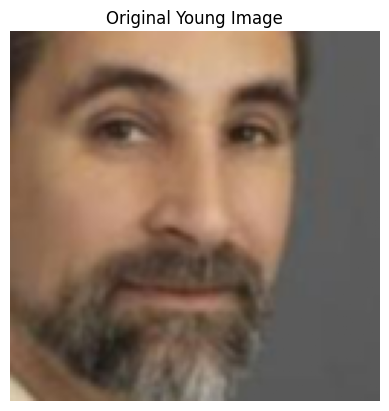

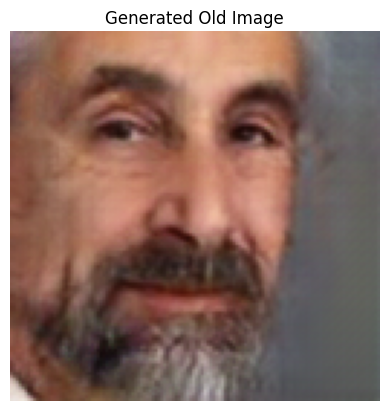

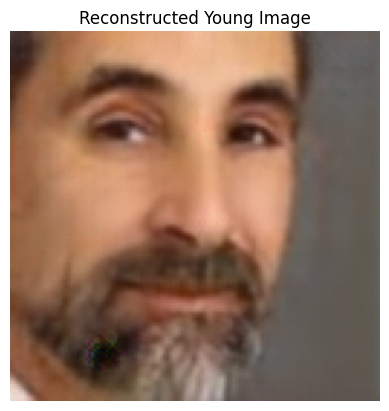

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize images
def imshow(tensor, title=None):
    tensor = tensor.cpu().clone()  # Clone to avoid modifying original tensor
    tensor = tensor.squeeze(0)  # Remove batch dimension
    tensor = tensor.permute(1, 2, 0)  # Convert to HWC
    tensor = (tensor + 1) / 2  # Unnormalize
    plt.imshow(tensor)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Sample evaluation: let's use the first image from the dataset
young_img = young_imgs[3].unsqueeze(0).to(device)  # Take one image from the dataset

# Generate the transformation (young to old and vice versa)
with torch.no_grad():
    fake_old = netG_YtoO(young_img)
    fake_young = netG_OtoY(fake_old)

# Display results
imshow(young_img[0], title='Original Young Image')
imshow(fake_old[0], title='Generated Old Image')
imshow(fake_young[0], title='Reconstructed Young Image')

In [ ]:
# Define paths for saving weights
save_path_drive = '/content/drive/MyDrive/CycleGAN_Weights'

import os
if not os.path.exists(save_path_drive):
    os.makedirs(save_path_drive)

# Save generator and discriminator weights
torch.save(netG_YtoO.state_dict(), os.path.join(save_path_drive, 'netG_YtoO.pth'))
torch.save(netG_OtoY.state_dict(), os.path.join(save_path_drive, 'netG_OtoY.pth'))
torch.save(netD_Y.state_dict(), os.path.join(save_path_drive, 'netD_Y.pth'))
torch.save(netD_O.state_dict(), os.path.join(save_path_drive, 'netD_O.pth'))

print("Weights saved to Google Drive.")

Weights saved to Google Drive.
